# Data Challenge - Bike Sharing Demand Prediction

## Team: nak
## Members:
    
               Nikolaos Koulos p3150079
               Athanasia Koulou s6180048
               Konstantinos Vasilopoulos p3180018

Import Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import keras


Using TensorFlow backend.


Load Data

In [307]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Feature Engineering

###  Analyze Data

We check for null values.
Likely there are no null values in given dataset

In [4]:
train.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data Visualization

Analyze the change in bike sharing pattern (count variable) with categorical variables:

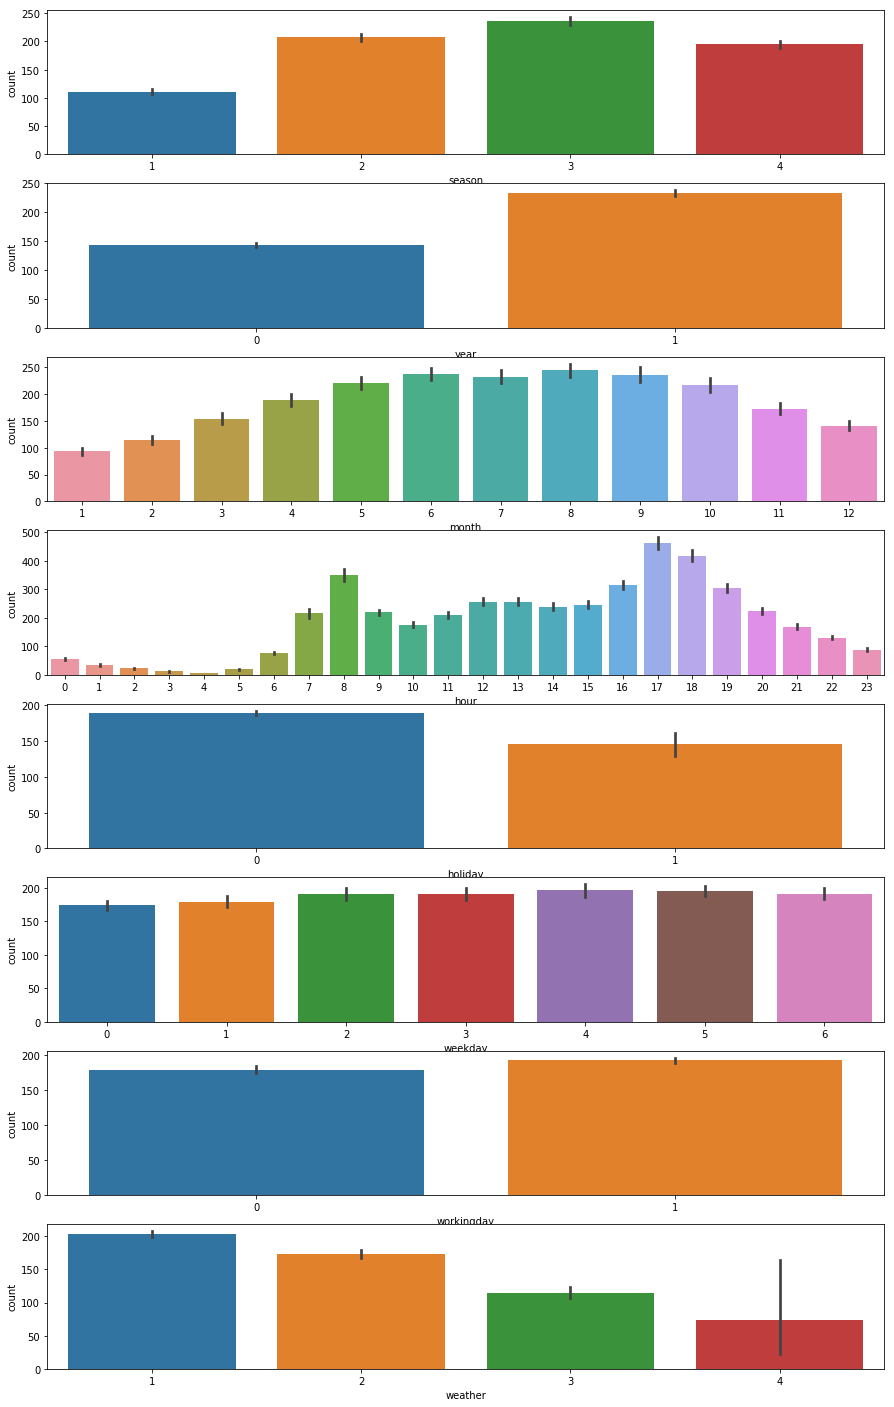

In [22]:
fig,[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] = plt.subplots(nrows=8, figsize=(15,25))
sn.barplot(x = train['season'], y = train['count'],ax = ax1)
sn.barplot(x = train['year'], y = train['count'],ax = ax2)
sn.barplot(x = train['month'], y = train['count'],ax = ax3)
sn.barplot(x = train['hour'], y = train['count'],ax = ax4)
sn.barplot(x = train['holiday'], y = train['count'],ax = ax5)
sn.barplot(x = train['weekday'], y = train['count'],ax = ax6)
sn.barplot(x = train['workingday'], y = train['count'],ax = ax7)
sn.barplot(x = train['weather'], y = train['count'],ax = ax8)

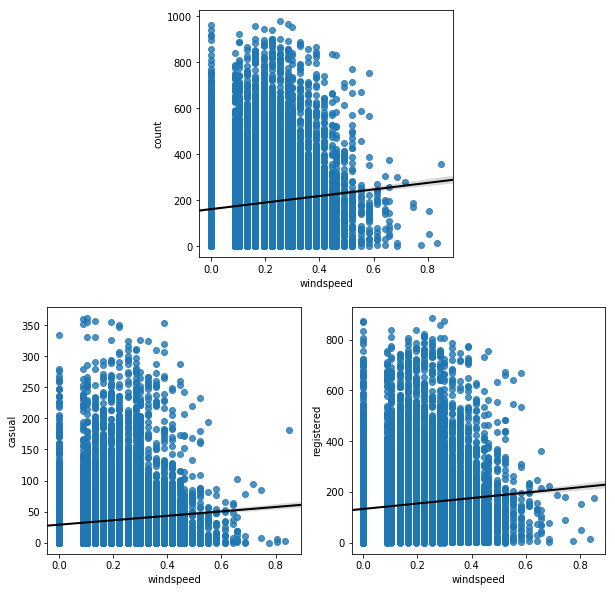

In [25]:
# windspeed

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.regplot(x='windspeed', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sn.regplot(x='windspeed', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sn.regplot(x='windspeed', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

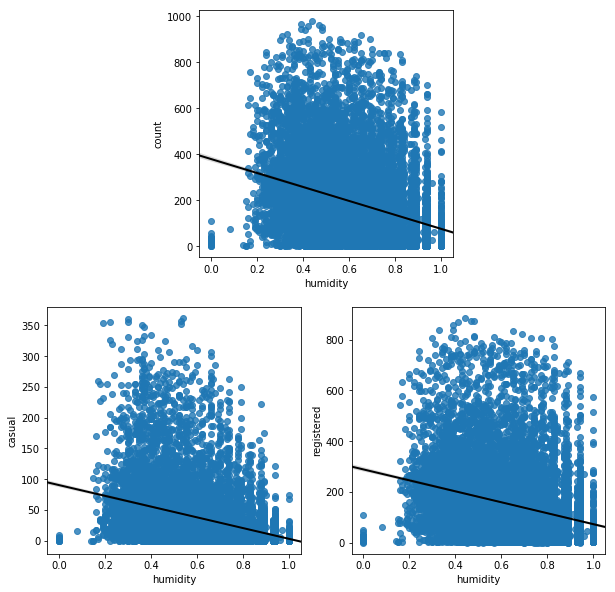

In [26]:
# humidity

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.regplot(x='humidity', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sn.regplot(x='humidity', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sn.regplot(x='humidity', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()


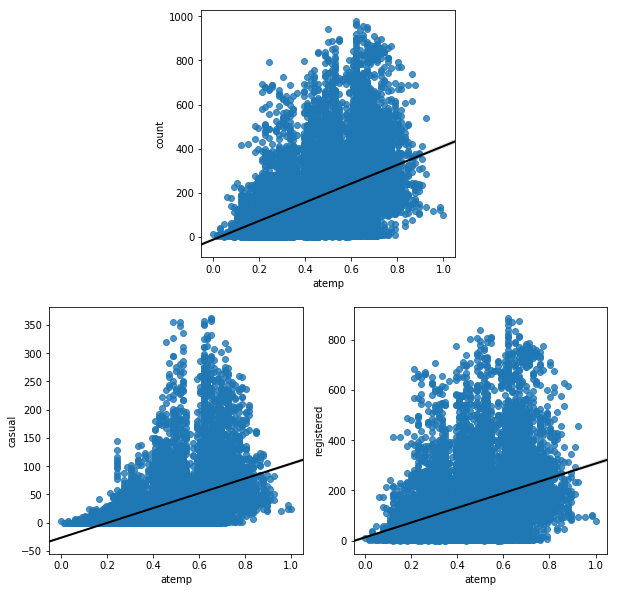

In [27]:
# atemp

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.regplot(x='atemp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sn.regplot(x='atemp', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sn.regplot(x='atemp', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

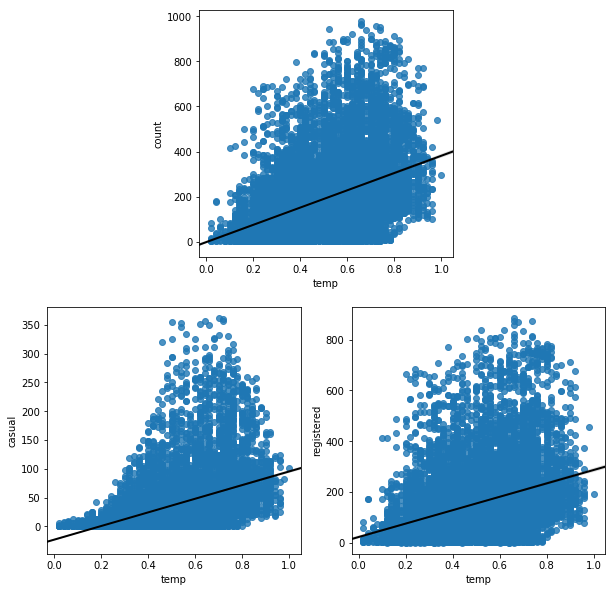

In [28]:
# temp

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.regplot(x='temp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sn.regplot(x='temp', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sn.regplot(x='temp', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

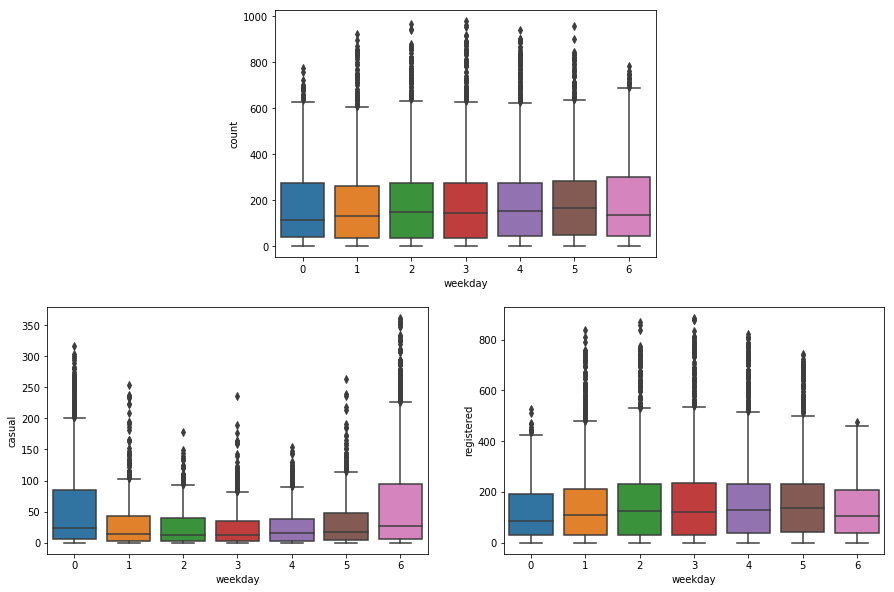

In [31]:
# dayofweek

fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='weekday', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='weekday', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='weekday', y='registered', data=train)
plt.show()

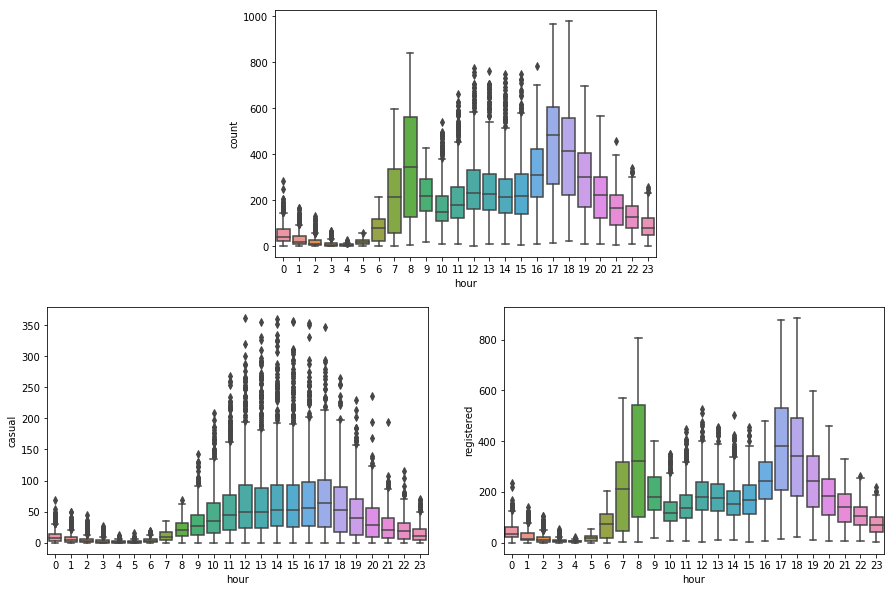

In [32]:
# hour

fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='hour', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='hour', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='hour', y='registered', data=train)
plt.show()

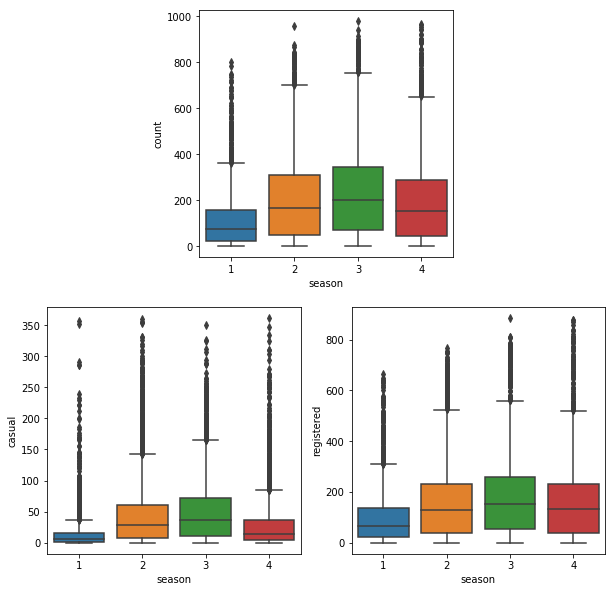

In [33]:
# season

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='season', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='season', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='season', y='registered', data=train)
plt.show()

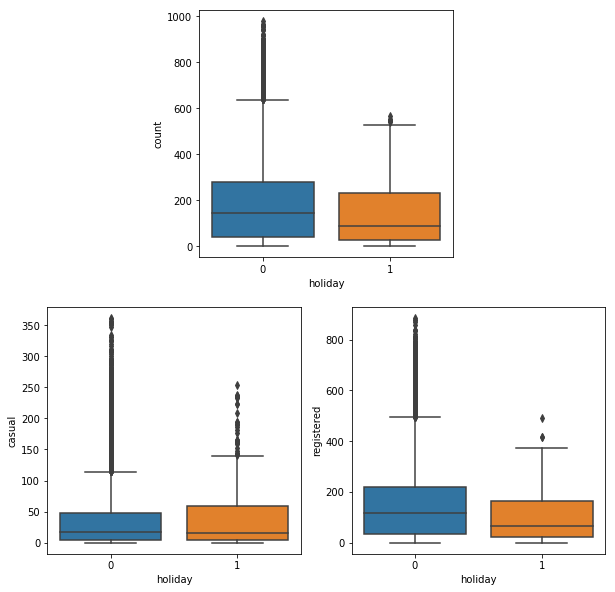

In [36]:
# holiday

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='holiday', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='holiday', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='holiday', y='registered', data=train)
plt.show()

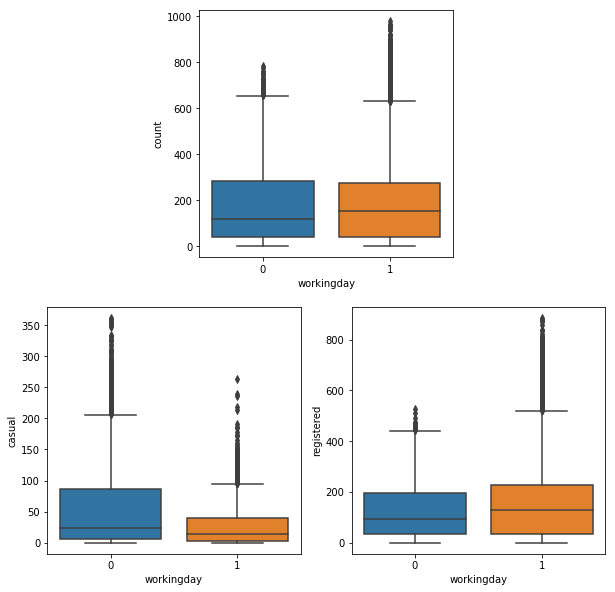

In [37]:
# workingday

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='workingday', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='workingday', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='workingday', y='registered', data=train)
plt.show()

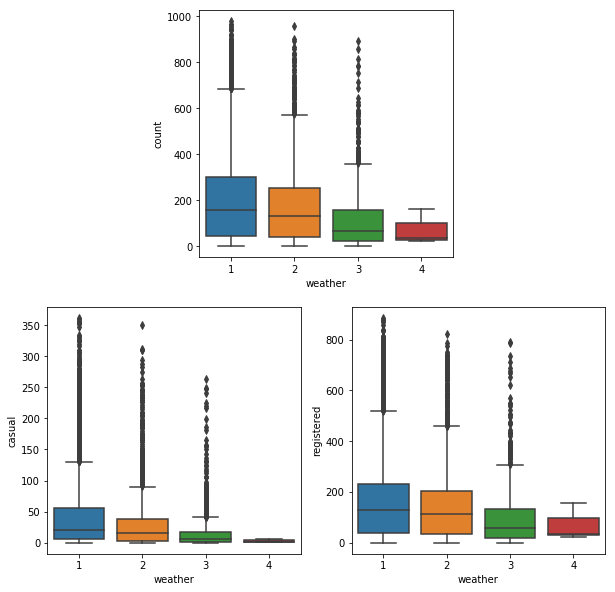

In [38]:
# weather

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='weather', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='weather', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='weather', y='registered', data=train)
plt.show()

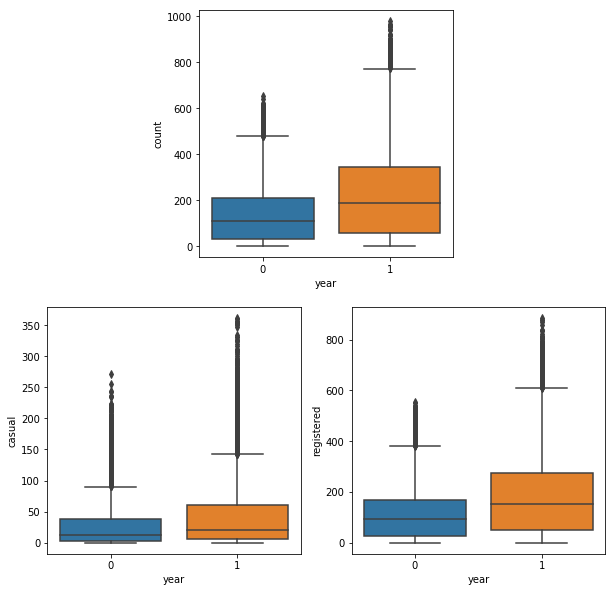

In [39]:
# year

fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='year', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='year', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='year', y='registered', data=train)
plt.show()

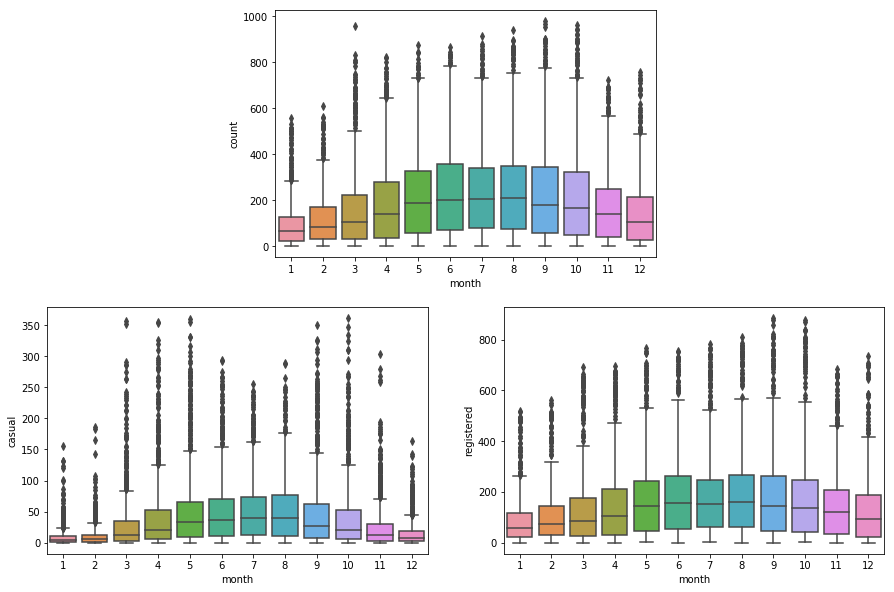

In [40]:
# month

fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sn.boxplot(x='month', y='count', data=train)
plt.subplot(gs1[2:, :2])
sn.boxplot(x='month', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sn.boxplot(x='month', y='registered', data=train)
plt.show()

From the above charts we conclude that:

    There is no obvious relationship in windspeed.
    Higher humidity leads to less rentals.
    Higher atemp leads to more rentals.
    Higher temp leads to more rentals.
    Non-registered user: less rentals in workingday.
    Registered user: more rentals in workingday.
    Non-registered user: more rentals during daytime.
    Registered user: more rentals when going to work / going off work.
    Non-registered user: less rentals in spring & winter.
    Registered user: less rentals in spring.
    Non-registered users: more rentals in holidays.
    Non-registered user: less rentals in workingday.
    Registered user: more rentals in workingday.
    More rentals in sunny & cloudy days.
    More rentals as time passes.
    Non-registered user: less rentals in spring & winter
    Registered user: less rentals in spring

#### Idea
We also can observe a strong relationship between registered /casual users and the rest of the variables. Due to this fact, we hope building a model which predicts registered and casual separately will perform better.

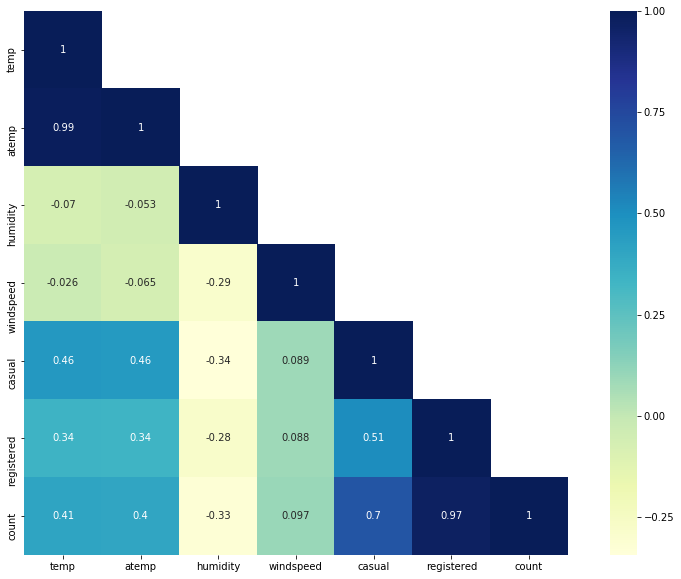

In [24]:
data_corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
mask = np.array(data_corr)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(15, 10))
sn.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True, cmap="YlGnBu")

### 2. Data preprocessing

Initially, we rename some variables.

In [51]:
train.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

test.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity'},inplace=True)

Some variables describe categories through their values. Therefore we transform the type of these values to categorial, as it improves the efficiency of some models 

In [52]:
train['season'] = train.season.astype('category')
train['year'] = train.year.astype('category')
train['month'] = train.month.astype('category')
train['hour'] = train.hour.astype('category')
train['holiday'] = train.holiday.astype('category')
train['weekday'] = train.weekday.astype('category')
train['workingday'] = train.workingday.astype('category')
train['weather'] = train.weather.astype('category')

train.dtypes

season        category
year          category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. 

In [54]:
# One-Hot-Encoding

X_train_seas = pd.get_dummies(train['season'],prefix = 'season')
X_train_yr = pd.get_dummies(train['year'],prefix = 'year')
X_train_mnth = pd.get_dummies(train['month'],prefix = 'month')
X_train_hol = pd.get_dummies(train['holiday'],prefix = 'holiday')
X_train_weekd = pd.get_dummies(train['weekday'],prefix = 'weekd')
X_train_workd = pd.get_dummies(train['workingday'],prefix = 'workd')
X_train_weathsit = pd.get_dummies(train['weather'],prefix = 'weather')
X_train_hr = pd.get_dummies(train['hour'],prefix = 'hour')

train_enc = pd.concat([train,X_train_seas,X_train_yr,X_train_mnth,X_train_hol,X_train_weekd,X_train_workd,X_train_weathsit],axis =1)
train_enc = train_enc.drop(['season','year','month','holiday','weekday','workingday','weather','hour'],axis=1)
train_enc.head()



,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,...,weekd_3,weekd_4,weekd_5,weekd_6,workd_0,workd_1,weather_1,weather_2,weather_3,weather_4
0,0.56,0.5303,0.64,0.3582,7,15,22,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.28,0.2727,0.65,0.2537,9,59,68,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.44,0.4394,0.41,0.1940,74,270,344,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,0.18,0.1970,0.93,0.1642,3,219,222,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.30,0.2727,0.45,0.2985,30,180,210,1,0,0,...,0,0,0,0,0,1,1,0,0,0


### Logarithmic transformation

1. Using the log transformation to make data conform to normality
2. Another popular use of the log transformation is to reduce the variability of data, especially in data sets that include outlying observations.

Later we will transform these variables back to their original form by applying exp transformation

In [55]:
# transfer the target from x to log(x + 1)
for col in ['casual', 'registered', 'count']:
    train['%s_log' % col] = np.log(train[col] + 1)

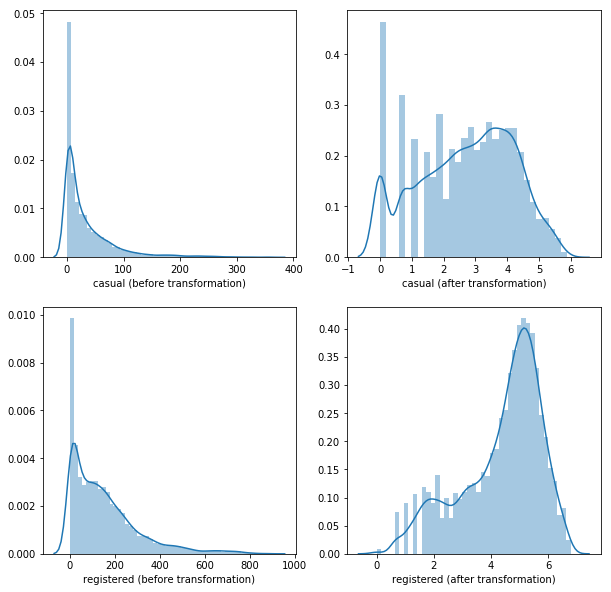

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(train['casual'])
plt.xlabel("casual (before transformation)")
plt.subplot(222)
sns.distplot(np.log(train['casual'] + 1))
plt.xlabel("casual (after transformation)")
plt.subplot(223)
sns.distplot(train['registered'])
plt.xlabel("registered (before transformation)")
plt.subplot(224)
sns.distplot(np.log(train['registered'] + 1))
plt.xlabel("registered (after transformation)")
plt.show()

### Scaling Data

In most cases we must scale our data. In this case we are given a dataset which is normalized. So there is no need to scale dataset.

### PCA

We choose to use temp and atemp as we could see that they have strong relationship in the above chart. So we could combine them without loosing too much information. It mostly was effective on later models, where alla the variables were used.

In [308]:
from sklearn.decomposition import PCA

def normalize_feature(feature_name, dataset):
    min_dataset = dataset[feature_name].min()
    max_dataset = dataset[feature_name].max()
    new_dataset = []

    for index, row in dataset.iterrows():
        new_dataset.append((row[feature_name] - min_dataset)/(max_dataset - min_dataset))
        
    dataset[feature_name] = new_dataset

pca = PCA(n_components=1)
pca.fit(pd.concat([train['atemp'], train['temp']], axis=1))
ldd_train = pca.transform(pd.concat([train['atemp'], train['temp']], axis=1))
ldd_test = pca.transform(pd.concat([test['atemp'], test['temp']], axis=1))
    
train['ldd'] = ldd_train
normalize_feature('ldd', train)

test['ldd'] = ldd_test
normalize_feature('ldd', test)




corr = train.corr()

## Model Building 


### Model 1
Initially, we implemented a simple Linear Regrassion model, trying different combinations of variables.
As expected this model did not have a decent performance. 

In [58]:
train_enc.head(5)

,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,...,weekd_3,weekd_4,weekd_5,weekd_6,workd_0,workd_1,weather_1,weather_2,weather_3,weather_4
0,0.56,0.5303,0.64,0.3582,7,15,22,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.28,0.2727,0.65,0.2537,9,59,68,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.44,0.4394,0.41,0.1940,74,270,344,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,0.18,0.1970,0.93,0.1642,3,219,222,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.30,0.2727,0.45,0.2985,30,180,210,1,0,0,...,0,0,0,0,0,1,1,0,0,0


RMSLE: 0.9519022315631852
R2: 0.756168573493456


[Text(0.5, 1.0, 'Comparison between the actual vs predicted values')]

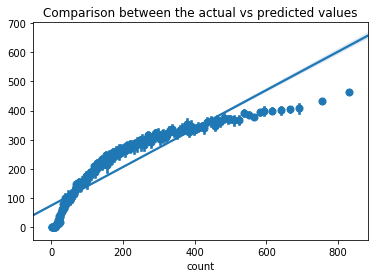

In [64]:
from sklearn.linear_model import LinearRegression

LR_train = train.drop(['year','month','holiday','weekday','workingday','temp','casual','registered','windspeed','humidity'], axis=1)


X_train_seas = pd.get_dummies(LR_train['season'],prefix = 'season')
X_train_weathsit = pd.get_dummies(LR_train['weather'],prefix = 'weather')
X_train_hr = pd.get_dummies(LR_train['hour'],prefix = 'hour')

LR_train = pd.concat([LR_train,X_train_seas,X_train_yr,X_train_mnth,X_train_hol,X_train_weekd,X_train_workd,X_train_weathsit],axis =1)
LR_train = LR_train.drop(['season','weather','hour'],axis=1)
LR_train.head()


X = LR_train.drop(['count'],axis=1)
y = LR_train["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
True in (y_pred < 0)

for i, y  in enumerate(y_pred):
    if y_pred[i] < 0:
        y_pred[i] = 0
        
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

ax = sn.regplot(y_test, y_pred, x_bins = 200)
ax.set(title = "Comparison between the actual vs predicted values")

We found that the most popular ML algorithms for Regression problems are:

    Neural Networks
    Regression Trees and Random Forests
    
So next we implemented Neural Networks through Keras.


### Dealing with missing values

As we were building our model we came up with a certain problem. Test dataset had no values in a category 4 of weathersit. This would impact the one-hot-encoding of variables. Since test would have less variables it would be impossible to run the Neural Network. To deal with this issue we compined both train and test datasets, preprocessed them together and later we splitted them.

In [309]:
def get_data():
    #get train data
    train_data_path ='C:/Users/nikos/assignment 2019/train.csv' 
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='C:/Users/nikos/assignment 2019/test.csv' 
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.cnt

  combined = train.append(test)
  combined.drop(['cnt'],axis = 1 , inplace = True)

  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

C:\Users\nikos\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [310]:
combined['season'] = combined.season.astype('category')
combined['yr'] = combined.yr.astype('category')
combined['mnth'] = combined.mnth.astype('category')
combined['hr'] = combined.hr.astype('category')
combined['holiday'] = combined.holiday.astype('category')
combined['weekday'] = combined.weekday.astype('category')
combined['workingday'] = combined.workingday.astype('category')
combined['weathersit'] = combined.weathersit.astype('category')

In [311]:
# One-Hot-Encoding

combined_seas = pd.get_dummies(combined['season'],prefix = 'season')
combined_yr = pd.get_dummies(combined['yr'],prefix = 'yr')
combined_mnth = pd.get_dummies(combined['mnth'],prefix = 'month')
combined_hol = pd.get_dummies(combined['holiday'],prefix = 'holiday')
combined_weekd = pd.get_dummies(combined['weekday'],prefix = 'weekd')
combined_workd = pd.get_dummies(combined['workingday'],prefix = 'workd')
combined_weathsit = pd.get_dummies(combined['weathersit'],prefix = 'weathsit')
combined_hr = pd.get_dummies(combined['hr'],prefix = 'hr')

combined = pd.concat([combined,combined_seas,combined_yr,combined_mnth,combined_hol,combined_weekd,combined_workd,combined_weathsit],axis =1)
combined = combined.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit','hr'],axis=1)
combined.head()



,atemp,casual,hum,registered,temp,windspeed,season_1,season_2,season_3,season_4,...,weekd_3,weekd_4,weekd_5,weekd_6,workd_0,workd_1,weathsit_1,weathsit_2,weathsit_3,weathsit_4
0,0.5303,7.0,0.64,15.0,0.56,0.3582,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0.2727,9.0,0.65,59.0,0.28,0.2537,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.4394,74.0,0.41,270.0,0.44,0.1940,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
3,0.1970,3.0,0.93,219.0,0.18,0.1642,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.2727,30.0,0.45,180.0,0.30,0.2985,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [312]:
def split_combined():
    global combined
    train = combined[:12165]
    test = combined[12165:]

    return train , test 
  
train, test = split_combined()

train["cnt"] = target

C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [313]:
# transfer the target from x to log(x + 1)
for x in [ 'cnt','casual','registered']:
    train['%s_log' % x] = np.log(train[x] + 1)


C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [316]:
X = train.drop(["cnt","cnt_log","casual_log","registered_log","casual","registered"],axis=1)
y = train["cnt_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [320]:
X_train.head(5)

,atemp,hum,temp,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekd_3,weekd_4,weekd_5,weekd_6,workd_0,workd_1,weathsit_1,weathsit_2,weathsit_3,weathsit_4
8351,0.3939,0.87,0.38,0.1940,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
7028,0.2424,0.93,0.24,0.1343,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7197,0.4848,0.51,0.50,0.3881,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
7217,0.4697,0.63,0.48,0.2239,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
8097,0.3333,0.50,0.36,0.3284,0,0,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0


### Model 2 - Neural Network


    Score: 0.27662 
    Training time: 200s

#### Model Notes
    
    Dense Layers is a regular densely-connected NN layer.
    Initializations define the way to set the initial random weights of Keras layers.
    We use Relu as an activasion function.
    We use ADAM optimizer which is the most popular optimizer for most cases.
    Through hyperparameterization we found that optimal learning rate is 0.01.
    We used Dropot Layer to avoid overfitting.
    We use linear activasion function in the final layer as we want to predict, a numeric value.
    Last layer has 1 neuron as we want to predict one value.
    The number of Layers we used came up through trial and error.
    We also used different dropout rates to have better generalization.

In [328]:
model = Sequential()

model.add(Dense(units=256, activation='relu' ,kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=256,activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model.add(Dropout(0.35))
model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None),bias_initializer='zeros'))
model.add(Dropout(0.35))
model.add(Dense(1, activation='linear', kernel_initializer=keras.initializers.he_uniform(seed=None)))


# Compile model
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.adam(lr=0.01))

In [329]:
model.fit(X_train, y_train, epochs=150, batch_size=128, shuffle =True)


Epoch 1/150
8515/8515 [==============================] - 1s 152us/step - loss: 1.4293
Epoch 2/150
8515/8515 [==============================] - 0s 42us/step - loss: 1.1627
Epoch 3/150
8515/8515 [==============================] - 0s 41us/step - loss: 1.1068
Epoch 4/150
8515/8515 [==============================] - 0s 40us/step - loss: 1.1011
Epoch 5/150
8515/8515 [==============================] - 0s 41us/step - loss: 1.0369
Epoch 6/150
8515/8515 [==============================] - 0s 40us/step - loss: 1.0296
Epoch 7/150
8515/8515 [==============================] - 0s 41us/step - loss: 0.9965
Epoch 8/150
8515/8515 [==============================] - 0s 40us/step - loss: 0.9863
Epoch 9/150
8515/8515 [==============================] - 0s 40us/step - loss: 0.9808
Epoch 10/150
8515/8515 [==============================] - 0s 41us/step - loss: 0.9697
Epoch 11/150
8515/8515 [==============================] - 0s 41us/step - loss: 0.9540
Epoch 12/150
8515/8515 [==============================] - 0s 4

In [330]:
y_pred = model.predict(X_test)

True in (y_pred < 0)
for i, y  in enumerate(y_pred):
    if y_pred[i] < 0:
        y_pred[i] = 0
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSLE: 0.287246868214201
R2: 0.2678675494883873


### Ensemble Neural Network

We also tried to combine 3 NN and evaluate the final pridections through "voting" from 3 separate models.
This model did not performed as expected though.


In [258]:
X = train.drop(["cnt","cnt_log","casual_log","registered_log","casual","registered"],axis=1)
y = train["cnt_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [259]:
X_train.head(5)

,atemp,hum,temp,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekd_3,weekd_4,weekd_5,weekd_6,workd_0,workd_1,weathsit_1,weathsit_2,weathsit_3,weathsit_4
8351,0.3939,0.87,0.38,0.1940,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
7028,0.2424,0.93,0.24,0.1343,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7197,0.4848,0.51,0.50,0.3881,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
7217,0.4697,0.63,0.48,0.2239,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
8097,0.3333,0.50,0.36,0.3284,0,0,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0


In [260]:
model1 = Sequential()

model1.add(Dense(units=256, activation='relu' ,kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros',input_shape=(X_train.shape[1],)))
model1.add(Dropout(0.5))
model1.add(Dense(units=256,activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model3.add(Dropout(0.2))
model1.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model1.add(Dropout(0.2))
model1.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None),bias_initializer='zeros'))
model1.add(Dropout(0.35))
model1.add(Dense(1, activation='linear', kernel_initializer=keras.initializers.he_uniform(seed=None)))

# Compile model
model1.compile(loss='mean_absolute_error', optimizer=keras.optimizers.adam(lr=0.01))

In [261]:
model1.fit(X_train, y_train, epochs=150, batch_size=128, shuffle =True)


Epoch 1/150
8515/8515 [==============================] - 2s 188us/step - loss: 1.8212
Epoch 2/150
8515/8515 [==============================] - 0s 37us/step - loss: 1.1618
Epoch 3/150
8515/8515 [==============================] - 0s 35us/step - loss: 1.0535
Epoch 4/150
8515/8515 [==============================] - 0s 36us/step - loss: 1.0279
Epoch 5/150
8515/8515 [==============================] - 0s 36us/step - loss: 0.9939
Epoch 6/150
8515/8515 [==============================] - 0s 35us/step - loss: 0.9870
Epoch 7/150
8515/8515 [==============================] - 0s 36us/step - loss: 0.9615
Epoch 8/150
8515/8515 [==============================] - 0s 37us/step - loss: 0.9721
Epoch 9/150
8515/8515 [==============================] - 0s 35us/step - loss: 0.9550
Epoch 10/150
8515/8515 [==============================] - 0s 36us/step - loss: 0.9451
Epoch 11/150
8515/8515 [==============================] - 0s 37us/step - loss: 0.9291
Epoch 12/150
8515/8515 [==============================] - 0s 3

In [262]:
model2 = Sequential()

model2.add(Dense(units=300, activation='relu' ,kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros',input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.5))
model2.add(Dense(units=256,activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model2.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model2.add(Dropout(0.2))
model2.add(Dense(units=100, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None),bias_initializer='zeros'))
model2.add(Dropout(0.35))
model2.add(Dense(1, activation='linear', kernel_initializer=keras.initializers.he_uniform(seed=None)))

# Compile model
model2.compile(loss='mean_absolute_error', optimizer=keras.optimizers.adam(lr=0.01))

In [263]:
model2.fit(X_train, y_train, epochs=150, batch_size=128, shuffle =True)


Epoch 1/150
8515/8515 [==============================] - 2s 191us/step - loss: 1.8134
Epoch 2/150
8515/8515 [==============================] - 0s 38us/step - loss: 1.2215
Epoch 3/150
8515/8515 [==============================] - 0s 38us/step - loss: 1.1476
Epoch 4/150
8515/8515 [==============================] - 0s 38us/step - loss: 1.1033
Epoch 5/150
8515/8515 [==============================] - 0s 37us/step - loss: 1.0670
Epoch 6/150
8515/8515 [==============================] - 0s 37us/step - loss: 1.0446
Epoch 7/150
8515/8515 [==============================] - 0s 37us/step - loss: 1.0250
Epoch 8/150
8515/8515 [==============================] - 0s 37us/step - loss: 1.0083
Epoch 9/150
8515/8515 [==============================] - 0s 37us/step - loss: 0.9921
Epoch 10/150
8515/8515 [==============================] - 0s 37us/step - loss: 0.9937
Epoch 11/150
8515/8515 [==============================] - 0s 37us/step - loss: 0.9884
Epoch 12/150
8515/8515 [==============================] - 0s 3

In [264]:
model3 = Sequential()

model3.add(Dense(units=256, activation='relu' ,kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros',input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.5))
model3.add(Dense(units=256,activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model3.add(Dropout(0.2))
model3.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model3.add(Dropout(0.2))
model3.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None),bias_initializer='zeros'))
model3.add(Dropout(0.35))
model3.add(Dense(1, activation='linear', kernel_initializer=keras.initializers.he_uniform(seed=None)))

# Compile model
model3.compile(loss='mean_absolute_error', optimizer=keras.optimizers.adam(lr=0.01))

In [265]:
model3.fit(X_train, y_train, epochs=200, batch_size=128, shuffle =True)


Epoch 1/200
8515/8515 [==============================] - 2s 195us/step - loss: 2.1605
Epoch 2/200
8515/8515 [==============================] - 0s 37us/step - loss: 1.1734
Epoch 3/200
8515/8515 [==============================] - 0s 37us/step - loss: 1.0980
Epoch 4/200
8515/8515 [==============================] - 0s 39us/step - loss: 1.0411
Epoch 5/200
8515/8515 [==============================] - 0s 37us/step - loss: 1.0257
Epoch 6/200
8515/8515 [==============================] - 0s 38us/step - loss: 1.0250
Epoch 7/200
8515/8515 [==============================] - 0s 39us/step - loss: 1.0018
Epoch 8/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.9781
Epoch 9/200
8515/8515 [==============================] - 0s 40us/step - loss: 0.9675
Epoch 10/200
8515/8515 [==============================] - 0s 38us/step - loss: 0.9539
Epoch 11/200
8515/8515 [==============================] - 0s 38us/step - loss: 0.9675
Epoch 12/200
8515/8515 [==============================] - 0s 3

8515/8515 [==============================] - 0s 37us/step - loss: 0.8652
Epoch 191/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8629
Epoch 192/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8604
Epoch 193/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8698
Epoch 194/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8728
Epoch 195/200
8515/8515 [==============================] - 0s 39us/step - loss: 0.8739
Epoch 196/200
8515/8515 [==============================] - 0s 41us/step - loss: 0.8656
Epoch 197/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8626
Epoch 198/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8639
Epoch 199/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8699
Epoch 200/200
8515/8515 [==============================] - 0s 37us/step - loss: 0.8673


In [272]:
prob1 = model1.predict(X_test)
prob2 = model2.predict(X_test)
prob3 = model3.predict(X_test)

final_prob = (prob1 + prob2 + prob3) / 3

True in (final_prob < 0)
for i, y  in enumerate(final_prob):
    if final_prob[i] < 0:
        final_prob[i] = 0

print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, final_prob)))
print('R2:', r2_score(y_test, final_prob))

RMSLE: 3.112596139149214
R2: -1.0354146417093744


### Neural Network on casual-registered

It did not work as efficient as we expected.

In [228]:
X = train.drop(['cnt',"cnt_log",'registered','casual'],axis=1)
y = train["casual_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head(5)

,atemp,hum,temp,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekd_5,weekd_6,workd_0,workd_1,weathsit_1,weathsit_2,weathsit_3,weathsit_4,casual_log,registered_log
8351,0.3939,0.87,0.38,0.1940,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,3.761200,5.252273
7028,0.2424,0.93,0.24,0.1343,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,2.079442,5.620401
7197,0.4848,0.51,0.50,0.3881,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,2.639057,4.553877
7217,0.4697,0.63,0.48,0.2239,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,2.708050,5.424950
8097,0.3333,0.50,0.36,0.3284,0,0,0,1,0,1,...,1,0,0,1,1,0,0,0,3.555348,5.099866


In [229]:
X = train.drop(['cnt',"cnt_log",'registered','casual','casual_log','registered_log'],axis=1)
y = train["casual_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()

model.add(Dense(units=256, activation='relu' ,kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=256,activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model3.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None),bias_initializer='zeros'))
model.add(Dropout(0.35))
model.add(Dense(1, activation='linear', kernel_initializer=keras.initializers.he_uniform(seed=None)))

# Compile model
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.adam(lr=0.01))

In [230]:
model.fit(X_train, y_train, epochs=150, batch_size=128, shuffle =True)


Epoch 1/150
8515/8515 [==============================] - 1s 152us/step - loss: 1.6575
Epoch 2/150
8515/8515 [==============================] - 0s 31us/step - loss: 1.0127
Epoch 3/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.9729
Epoch 4/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.9336
Epoch 5/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.9071
Epoch 6/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.8892
Epoch 7/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.8752
Epoch 8/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.8716
Epoch 9/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.8596
Epoch 10/150
8515/8515 [==============================] - 0s 30us/step - loss: 0.8498
Epoch 11/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.8522
Epoch 12/150
8515/8515 [==============================] - 0s 3

In [231]:
pred_casual = model.predict(X_test)

True in (pred_casual < 0)
for i, y  in enumerate(pred_casual):
    if pred_casual[i] < 0:
        pred_casual[i] = 0
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred_casual)))
print('R2:', r2_score(y_test, pred_casual))

RMSLE: 0.4057689177206251
R2: 0.5476713666643437


In [232]:
X = train.drop(['cnt',"cnt_log",'registered','casual','casual_log','registered_log'],axis=1)
y = train["registered_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()

model.add(Dense(units=256, activation='relu' ,kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=256,activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model3.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), bias_initializer='zeros'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None),bias_initializer='zeros'))
model.add(Dropout(0.35))
model.add(Dense(1, activation='linear', kernel_initializer=keras.initializers.he_uniform(seed=None)))

# Compile model
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.adam(lr=0.01))

In [233]:
model.fit(X_train, y_train, epochs=150, batch_size=128, shuffle =True)


Epoch 1/150
8515/8515 [==============================] - 1s 162us/step - loss: 2.1725
Epoch 2/150
8515/8515 [==============================] - 0s 32us/step - loss: 1.1863
Epoch 3/150
8515/8515 [==============================] - 0s 33us/step - loss: 1.0747
Epoch 4/150
8515/8515 [==============================] - 0s 32us/step - loss: 1.0426
Epoch 5/150
8515/8515 [==============================] - 0s 31us/step - loss: 1.0266
Epoch 6/150
8515/8515 [==============================] - 0s 34us/step - loss: 0.9979
Epoch 7/150
8515/8515 [==============================] - 0s 33us/step - loss: 0.9949
Epoch 8/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.9730
Epoch 9/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.9719
Epoch 10/150
8515/8515 [==============================] - 0s 33us/step - loss: 0.9612
Epoch 11/150
8515/8515 [==============================] - 0s 31us/step - loss: 0.9597
Epoch 12/150
8515/8515 [==============================] - 0s 3

8515/8515 [==============================] - 0s 31us/step - loss: 0.8833
Epoch 97/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.8830
Epoch 98/150
8515/8515 [==============================] - 0s 31us/step - loss: 0.8813
Epoch 99/150
8515/8515 [==============================] - 0s 35us/step - loss: 0.8772
Epoch 100/150
8515/8515 [==============================] - 0s 31us/step - loss: 0.8810
Epoch 101/150
8515/8515 [==============================] - 0s 31us/step - loss: 0.8815
Epoch 102/150
8515/8515 [==============================] - 0s 31us/step - loss: 0.8798
Epoch 103/150
8515/8515 [==============================] - 0s 31us/step - loss: 0.8779
Epoch 104/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.8730
Epoch 105/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.8712
Epoch 106/150
8515/8515 [==============================] - 0s 32us/step - loss: 0.8758
Epoch 107/150
8515/8515 [==============================] - 0

In [234]:
pred_registered = model.predict(X_test)

True in (pred_registered < 0)
for i, y  in enumerate(pred_registered):
    if pred_registered[i] < 0:
        pred_registered[i] = 0
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred_registered)))
print('R2:', r2_score(y_test, pred_registered))

RMSLE: 0.294745169306888
R2: 0.2705016385870923


In [237]:
X = train.drop(['cnt',"cnt_log",'registered','casual','casual_log','registered_log'],axis=1)
y = train["cnt_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pred1 = pred_casual + pred_registered

for i, y  in enumerate(pred1):
    if pred1[i] < 0:
        pred1[i] = 0
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred1)))
print('R2:', r2_score(y_test, pred1))

RMSLE: 0.5101346061563317
R2: -3.935923820159374


### Model 3 - Random Forest

    Score: 0.324
    Training Time: 0.4s

#### Notes
     one hot encoding is not required in tree decision algorithms.
     score efficiency did not change by categorial values
     

In [273]:
def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [291]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [292]:
train.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

test.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity'},inplace=True)

# transfer the target from x to log(x + 1)
for x in ['casual', 'registered', 'count']:
    train['%s_log' % x] = np.log(train[x] + 1)
y_train.head(5)

8351    5.451038
7028    5.645447
7197    4.682131
7217    5.484797
8097    5.288267
Name: count_log, dtype: float64

In [294]:
#PCA
from sklearn.decomposition import PCA

def normalize_feature(feature_name, dataset):
    min_dataset = dataset[feature_name].min()
    max_dataset = dataset[feature_name].max()
    new_dataset = []

    for index, row in dataset.iterrows():
        new_dataset.append((row[feature_name] - min_dataset)/(max_dataset - min_dataset))
        
    dataset[feature_name] = new_dataset

pca = PCA(n_components=1)
pca.fit(pd.concat([train['atemp'], train['temp']], axis=1))
ldd_train = pca.transform(pd.concat([train['atemp'], train['temp']], axis=1))
ldd_test = pca.transform(pd.concat([test['atemp'], test['temp']], axis=1))
    
train['ldd'] = ldd_train
normalize_feature('ldd', train)

test['ldd'] = ldd_test
normalize_feature('ldd', test)




corr = train.corr()

In [296]:
X = train.drop(['count',"count_log"],axis=1)
y = train["count_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

features = ['season','month', 'year','hour', 'holiday','weekday','workingday','weather','ldd',
            'humidity','windspeed']
reg = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, random_state=0, n_jobs=-1)
reg.fit(X_train[features], y_train)
y_pred = reg.predict(X_test[features])
y_pred = np.exp(y_pred) - 1
y_pred[y_pred< 0] = 0

y_test =  np.exp(y_test) - 1

print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSLE: 0.32497516658620457
R2: 0.9342096934463525


### Hyperparameter tuning

{'n_estimators': 1000}


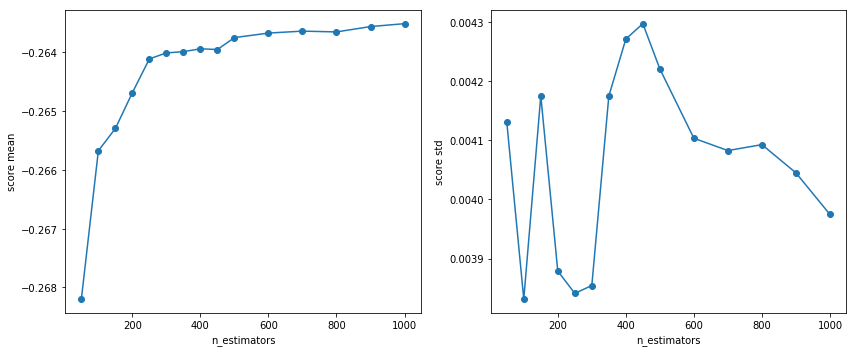

{'n_estimators': 700}


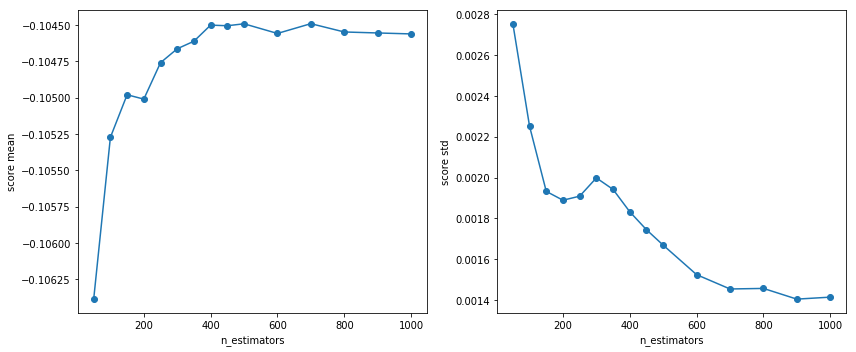

In [282]:
# larger n_estimators is better
def plot_cv(param, bestreg, variable):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(param[variable], bestreg.cv_results_['mean_test_score'], 'o-')
    plt.xlabel(variable)
    plt.ylabel("score mean")
    plt.subplot(122)
    plt.plot(param[variable], bestreg.cv_results_['std_test_score'], 'o-')
    plt.xlabel(variable)
    plt.ylabel("score std")
    plt.tight_layout()
    plt.show()

year_month = train['year'] * 100 + train['month']
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

reg = RandomForestRegressor(random_state=0, n_jobs=-1)
param = {"n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['casual_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "n_estimators")

reg = RandomForestRegressor(random_state=0, n_jobs=-1)
param = {"n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['registered_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "n_estimators")

{'min_samples_leaf': 2}


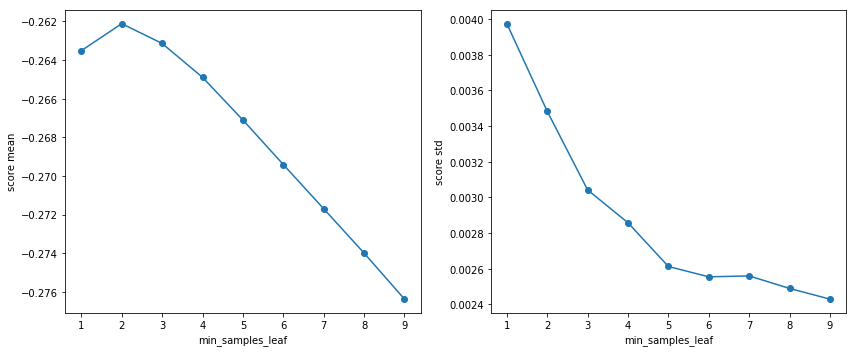

{'min_samples_leaf': 1}


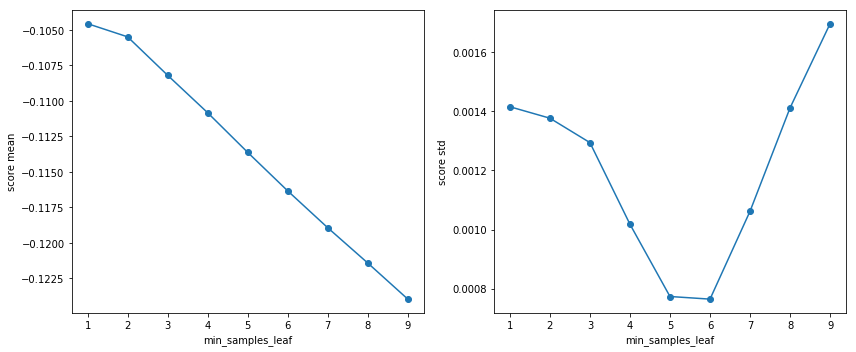

In [283]:
# tune min_samples_leaf
reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
param = {"min_samples_leaf": np.arange(1, 10, 1)}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['casual_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "min_samples_leaf")

reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
param = {"min_samples_leaf": np.arange(1, 10, 1)}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['registered_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "min_samples_leaf")

### Model 4 - Gradient Boosting Regression

    Score: 0.2996
    Training time: 4s

#### Note 
Despite different variable selection worked better in simple models, it seems that GBS was more efficient with complete dataset


In [297]:
X = train.drop(['count',"count_log"],axis=1)
y = train["count_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train.head(5)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_log,registered_log,count_log,ldd
0,4,0,11,0,0,2,1,1,0.56,0.5303,0.64,0.3582,7,15,22,2.079442,2.772589,3.135494,0.549640
1,1,0,2,21,0,6,0,1,0.28,0.2727,0.65,0.2537,9,59,68,2.302585,4.094345,4.234107,0.269294
2,4,1,11,12,0,3,1,1,0.44,0.4394,0.41,0.1940,74,270,344,4.317488,5.602119,5.843544,0.439053
3,1,1,1,7,0,2,1,2,0.18,0.1970,0.93,0.1642,3,219,222,1.386294,5.393628,5.407172,0.177163
4,1,1,3,16,0,1,1,1,0.30,0.2727,0.45,0.2985,30,180,210,3.433987,5.198497,5.351858,0.280297


In [ ]:
#PCA
from sklearn.decomposition import PCA

def normalize_feature(feature_name, dataset):
    min_dataset = dataset[feature_name].min()
    max_dataset = dataset[feature_name].max()
    new_dataset = []

    for index, row in dataset.iterrows():
        new_dataset.append((row[feature_name] - min_dataset)/(max_dataset - min_dataset))
        
    dataset[feature_name] = new_dataset

pca = PCA(n_components=1)
pca.fit(pd.concat([train['atemp'], train['temp']], axis=1))
ldd_train = pca.transform(pd.concat([train['atemp'], train['temp']], axis=1))
ldd_test = pca.transform(pd.concat([test['atemp'], test['temp']], axis=1))
    
train['ldd'] = ldd_train
normalize_feature('ldd', train)

test['ldd'] = ldd_test
normalize_feature('ldd', test)




corr = train.corr()

In [299]:
X = train.drop(['count',"count_log"],axis=1)
y = train["count_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

features = ['season','month', 'year','hour', 'holiday','weekday','workingday','weather','ldd',
            'humidity','windspeed']

reg = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=6, random_state=0)
reg.fit(X_train[features], y_train)
y_pred = reg.predict(X_test[features])
y_pred = np.exp(y_pred) - 1
y_pred[y_pred< 0] = 0

y_test =  np.exp(y_test) - 1

print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSLE: 0.2996046364580217
R2: 0.9435008618933447


### Hyperparameter tuning

{'n_estimators': 900}


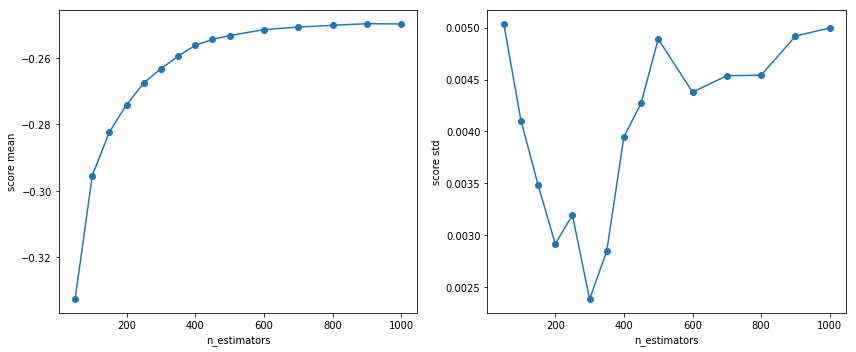

{'n_estimators': 1000}


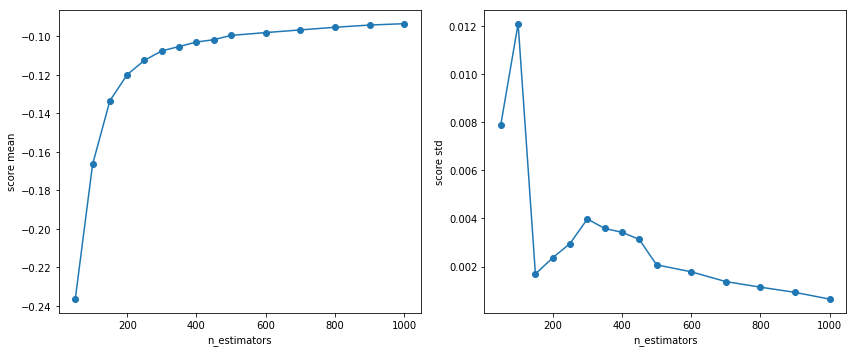

In [280]:
def plot_cv(param, bestreg, variable):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(param[variable], bestreg.cv_results_['mean_test_score'], 'o-')
    plt.xlabel(variable)
    plt.ylabel("score mean")
    plt.subplot(122)
    plt.plot(param[variable], bestreg.cv_results_['std_test_score'], 'o-')
    plt.xlabel(variable)
    plt.ylabel("score std")
    plt.tight_layout()
    plt.show()

year_month = train['year'] * 100 + train['month']
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

reg = GradientBoostingRegressor(random_state=0)
param = {"n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['casual_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "n_estimators")

reg = GradientBoostingRegressor(random_state=0)
param = {"n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['registered_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "n_estimators")

{'min_samples_leaf': 7}


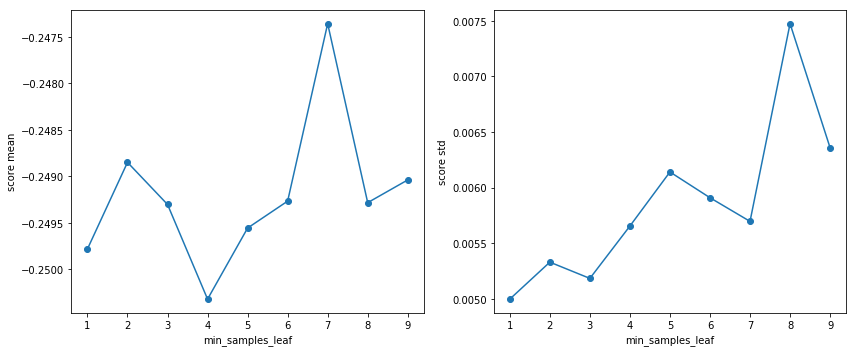

{'min_samples_leaf': 6}


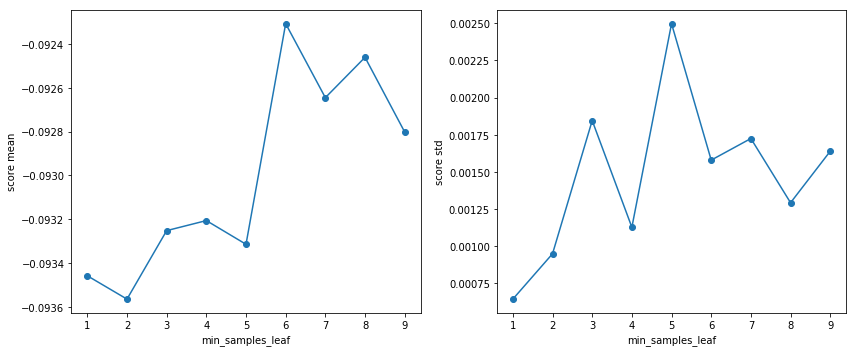

In [281]:
# tune min_samples_leaf
reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
param = {"min_samples_leaf": np.arange(1, 10, 1)}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['casual_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "min_samples_leaf")

reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
param = {"min_samples_leaf": np.arange(1, 10, 1)}
bestreg = GridSearchCV(reg, param, cv=kf.split(train, year_month), scoring='neg_mean_squared_error')
bestreg.fit(train[features], train['registered_log'])
print(bestreg.best_params_)
plot_cv(param, bestreg, "min_samples_leaf")

We then try to predict casual and registerd users instead

### Model 5 - Random Forest and Gradient Boosting Regression

This model provided the best score. So we used it for submitting our predictions.
Score 0.29169 in final standing
Score 0.27859 in public score

We used both models to provide different predictions. Later we used the model with the more efficient prediction and gave it 60% weight and 40% on the other one.
We also used logarithmic transformation to predict casual and registered.



In [300]:
#Random Forest 

#predict casual

features = ['season','month', 'year','hour', 'holiday','weekday','workingday','weather','ldd',
            'humidity','windspeed']
reg = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, random_state=0, n_jobs=-1)
reg.fit(train[features], train['casual_log'])
pred_casual = reg.predict(test[features])
pred_casual = np.exp(pred_casual) - 1
pred_casual[pred_casual < 0] = 0

#predict registered
# 
features = ['season','month', 'year','hour', 'holiday','weekday','workingday','weather','ldd',
            'humidity','windspeed']
reg = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, random_state=0, n_jobs=-1)
reg.fit(train[features], train['registered_log'])
pred_registered = reg.predict(test[features])
pred_registered = np.exp(pred_registered) - 1
pred_registered[pred_registered < 0] = 0

pred1 = pred_casual + pred_registered


#Gradient Boosting Regression

#predict casual

features = ['season','month', 'year','hour', 'holiday','weekday','workingday','weather','ldd',
            'humidity','windspeed']
reg = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=6, random_state=0)
reg.fit(train[features],train['casual_log'])
pred_casual = reg.predict(test[features])
pred_casual = np.exp(pred_casual) - 1
pred_casual[pred_casual < 0] = 0

#predict registered

features = ['season','month', 'year','hour', 'holiday','weekday','workingday','weather','ldd',
            'humidity','windspeed']
reg = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=6, random_state=0)
reg.fit(train[features],train['registered_log'])
pred_registered  = reg.predict(test[features])
pred_registered  = np.exp(pred_registered ) - 1
pred_registered [pred_registered  < 0] = 0

pred2 = pred_casual + pred_registered

# higher weight for better model

pred = 0.6 * pred2 + 0.4 * pred1

submission = pd.DataFrame()
submission['Id'] = range(pred1.shape[0])
submission['Predicted'] = pred

submission.to_csv("submission.csv", index=False)

### Final Thoughts 

    Try Greed Searching more PCA combinations
    Our score fell from 0.27 to 0.29  in the final score which means that we had some form of overfitting. 
    RNN neural network could perform nice, as the sequence of our variables could be of some importance for our predictions.